Statistica Elementare con Numpy
===============================

<img src="../Humour/extrapolating1.png" width="500" align="center"/>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Dati in un array numpy.

In [40]:
dati = np.array([1.95,1.96,1.9,1.9,1.84,1.81,2.06,1.99,1.93,1.97,2.02,1.92,1.95,1.88,1.87,2.03,1.85,2.08,1.96,1.81,
                2.07,1.91,1.79,1.99,1.97,1.95,1.96,1.93,1.83,2.09,2.02,2.09,1.84,1.86,1.96,2.03,1.93,1.9,1.94,1.87,
                1.97,1.91,1.87,1.81,2.06,2.02,1.96,1.81,1.93,2.03,1.92,1.96,1.8,1.95,1.9,2.02,2.03,1.9,2.03,2.02,
                1.96,1.9,1.98,1.87,1.9,1.89,1.84,2.06,1.93,2.06,1.93,1.93,1.9,1.9,1.9,1.93,1.86,1.83,1.96,1.81,2.03,
                1.98,1.84,1.86,1.96,1.81,1.98,1.84,1.86,1.96,1.92,1.96,1.85,2.04,2,1.92,1.9,2.15,1.94,1.92])

In [ ]:
num_elementi = dati.size
num_elementi

Dati al quadrato

In [ ]:
dati_sq = dati*dati

Il valor medio o media di un insieme di dati $x = [x_1,\cdots,x_n]$ è
$$ <x> = \frac{\sum_{i=1}^n x_i}{n} $$
Media utilizzando solo la funzione sum

In [ ]:
media1 = dati.sum()/num_elementi
media1

Media utilizzando la funzione mean di numpy

In [41]:
media2 = dati.mean()
media2

1.9357

La varianza di un insieme di dati $x = [x_1,\cdots,x_n]$ è
$$ \sigma^2  = \, <(x - <x>)^2> \, = \frac{\sum_{i=1}^n (x_i-<x>)^2}{n} $$
Varianza calcolata espicitamente

In [ ]:
varianza1 = (dati_sq - 2.*media1*dati + media1*media1).sum()/num_elementi # Notice array + const*array + const
varianza1

Varianza empirica

In [ ]:
varianzaEmp = (dati_sq - 2.*media1*dati + media1*media1).sum()/(num_elementi-1)
varianzaEmp

In [ ]:
varianzaEmp1 = (dati_sq - media1*media1).sum()/(num_elementi-1) 
varianzaEmp1

Varianza calcolata usando la funzione var di numpy (divide per N).

In [ ]:
varianza2 = dati.var()
varianza2

Deviazione standard, $\sigma = \sqrt{\sigma^2}$, calcolata dalla varianza e usando la funzione std di numpy

In [ ]:
deviazione_std1 = np.sqrt(varianza2)
deviazione_std1

In [48]:
deviazione_std2 = dati.std()
deviazione_std2

0.07747586721037715

Selezione dei dati a meno di 3*sigma da media1

In [ ]:
dati1 = np.array([n for n in dati if np.absolute(n - media1) < 3.*deviazione_std1])

In [ ]:
dati1.size

Nessun dato viene scartato. Test: vediamo quanti dati sono compresi in un intervallo di +/- sigma

In [ ]:
dati1 = np.array([n for n in dati if np.absolute(n - media1) < deviazione_std1])

In [ ]:
dati1.size

Istogramma delle frequenze

In [20]:
min = dati.min()
min

1.79

In [21]:
max = dati.max()
max

2.15

In [22]:
nbins = 10
xrange = (1.75,2.20)

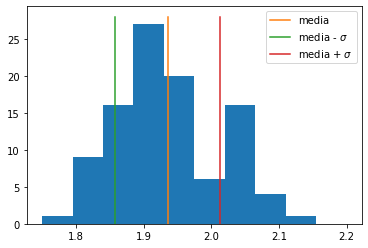

In [52]:
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(dati, nbins, range=xrange)
ax.plot(np.ones(2)*media2,[0,nevent.max()+1],label="media")
ax.plot(np.ones(2)*media2-deviazione_std2,[0,nevent.max()+1],label="media - $\sigma$")
ax.plot(np.ones(2)*media2+deviazione_std2,[0,nevent.max()+1],label="media + $\sigma$")
ax.legend();

In [ ]:
nevent       # Numero di eventi in ciacun bin

In [ ]:
bins         # Estremi dei bin

I patches sono i rettangoli (blu in questo caso) che vengono usati per disegnare l'istogramma.

<img src="../Humour/NormalDistribution.jpg" width="400" align="left"/>

Distribuzione gaussiana casuale con stessa media e deviazione standard di quella osservata. Istogramma delle frequenze.

In [ ]:
gaussdati = media1 + deviazione_std1*np.random.randn(100)

In [ ]:
fig1, ax1 = plt.subplots()
n1, bins1, patches1 = ax1.hist(gaussdati, nbins, range=xrange)

In [ ]:
def ek(xval,ave,stdev):
    return np.exp(-((xval-ave)/stdev)**2/2.0)/stdev/np.sqrt(2.0*np.pi)

In [ ]:
halfBinWidth = (bins[1]-bins[0])/2.

Dall'array bins che contiene gli estremi dei bin costruiamo l'array dei punti medi dei bin (bins + halfBinWidth), eliminando l'ultimo elemento (np.delete(   ,-1)).

In [ ]:
points = np.delete(bins + halfBinWidth,-1)
points

Test that the approximate integral of ek is equal to one.

In [ ]:
ek(points,media1,deviazione_std1).sum()*halfBinWidth*2.

In [ ]:
ekval = ek(points,media1,deviazione_std1)*halfBinWidth*2.*num_elementi

Frequenze osservate vs frequenze attese

In [ ]:
print("frequenze osservate",nevent)
print("frequenze attese   ",ekval)

In [ ]:
chisq = ((ekval-nevent)**2/ekval).sum()
chisq

<img src="../Humour/extrapolating2.png" width="850" align="left"/>

Numeri Casuali
---------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt         # plotting of results

#help(np.random.normal)

- Come generare numeri distribuiti secondo la distribuzione normale standard $\mu = 0.0,\, \sigma = 1.0\,$. 

In [3]:
m1 = np.random.normal(size=2000)

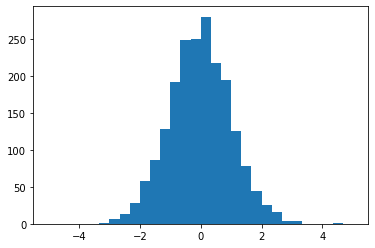

In [4]:
nbins = 30
xrange = (-5,5)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m1, nbins, range=xrange)

- Come generare numeri distribuiti secondo la distribuzione normale con $\mu = -2.0,\, \sigma = 0.3\,$. 

In [ ]:
m2 = np.random.normal(loc=-2., scale=0.3, size=2000)

In [ ]:
nbins = 300
xrange = (-5,1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m2, nbins, range=xrange)

- Come generare numeri distribuiti secondo la distribuzione uniforme standard $[0,1]$. 

In [ ]:
help(np.random)

In [ ]:
m3 = np.random.random_sample(size=2000)

In [ ]:
nbins = 12
xrange = (-0.1,1.1)    # ntupla
fig, ax = plt.subplots()
nevent, bins, patches = ax.hist(m3, nbins, range=xrange)

In [ ]:
help(np.random.random_integers)

In [ ]:
m4 = np.random.random_integers(0,high=100,size=20)
m4

In [ ]:
m4 = np.random.randint(0,101,size=20)
m4

    Compatibility functions
    =============================================================================
    rand                 Uniformly distributed values.
    randn                Normally distributed values.
    ranf                 Uniformly distributed floating point numbers.
    randint              Uniformly distributed integers in a given range.
    =============================================================================
    

In [ ]:
#help(np.random.random)

In [ ]:
#dir(np.random)

Si può fissare il "seme" del generatore di numeri casuali in modo da ottenere la stessa sequenza più volte.
Utile qundo si vogliono capire le analisi statistiche fatte da qualcun altro. Si usa `np.random.seed`.

In [ ]:
np.random.seed(12345)

In [ ]:
np.random.random(10)

In [8]:
np.random.random(10)

array([0.74771481, 0.96130674, 0.0083883 , 0.10644438, 0.29870371,
       0.65641118, 0.80981255, 0.87217591, 0.9646476 , 0.72368535])

In [7]:
np.random.seed(12345)
np.random.random(10)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])